# Exploratory Data Analysis (EDA)
This notebook explores the cleaned dataset for patterns, feature distributions, group differences, and feature importance.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# load the dataset
df = pd.read_csv('../data/processed/combined_features/cleaned_dataset.csv')

# display the first few rows
df.head()

Matplotlib is building the font cache; this may take a moment.


,Participant,Total Words,Unique Words,Mean Sentence Length,Disfluencies,AudioFile,Group,Task,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5
0,107-1,85,59,7.727273,0,data/raw/audio/control/cookie/107-1.mp3,control,cookie,NaN,NaN,NaN,NaN,NaN
1,002-3,130,78,10.833333,5,data/raw/audio/control/cookie/002-3.mp3,control,cookie,NaN,NaN,NaN,NaN,NaN
2,332-0,56,41,9.333333,0,data/raw/audio/control/recall/332-0.mp3,control,cookie,NaN,NaN,NaN,NaN,NaN
3,021-4,54,38,6.750000,1,data/raw/audio/control/cookie/021-4.mp3,control,cookie,NaN,NaN,NaN,NaN,NaN
4,071-1,106,73,5.888889,5,data/raw/audio/control/cookie/071-1.mp3,control,cookie,NaN,NaN,NaN,NaN,NaN


## Feature Distributions
Examining overall distributions of key features.

       Total Words  Unique Words  Mean Sentence Length  Disfluencies  \
count   266.000000    266.000000            266.000000    266.000000   
mean    116.071429     71.022556              7.880320      3.635338   
std      55.499231     26.851223              2.220610      4.595990   
min      37.000000     30.000000              3.025641      0.000000   
25%      71.000000     49.000000              6.723214      1.000000   
50%     109.000000     68.500000              8.101010      2.000000   
75%     143.000000     87.000000              9.333333      5.000000   
max     434.000000    175.000000             11.833333     39.000000   

       Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  
count        0.0        0.0        0.0        0.0        0.0  
mean         NaN        NaN        NaN        NaN        NaN  
std          NaN        NaN        NaN        NaN        NaN  
min          NaN        NaN        NaN        NaN        NaN  
25%          NaN        NaN        N

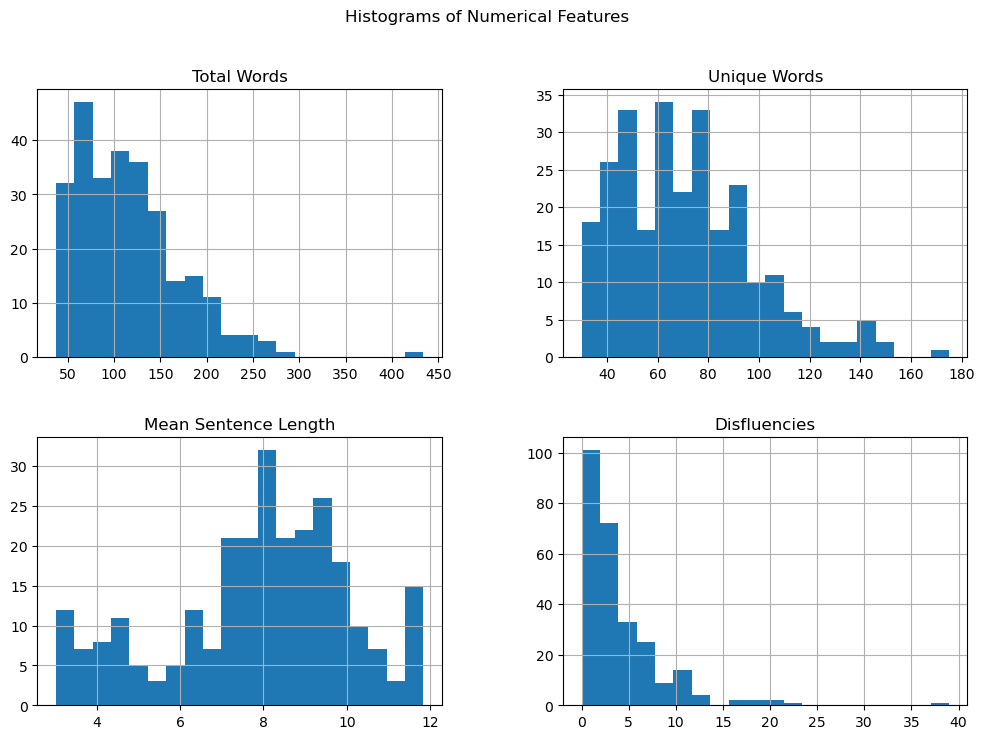

/var/folders/9t/wr9xvgnd2f54gfqg0n7k4g4c0000gn/T/ipykernel_29758/2290064224.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True)


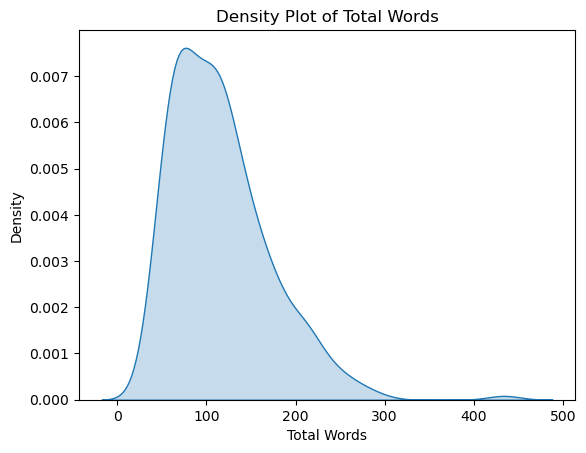

/var/folders/9t/wr9xvgnd2f54gfqg0n7k4g4c0000gn/T/ipykernel_29758/2290064224.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True)


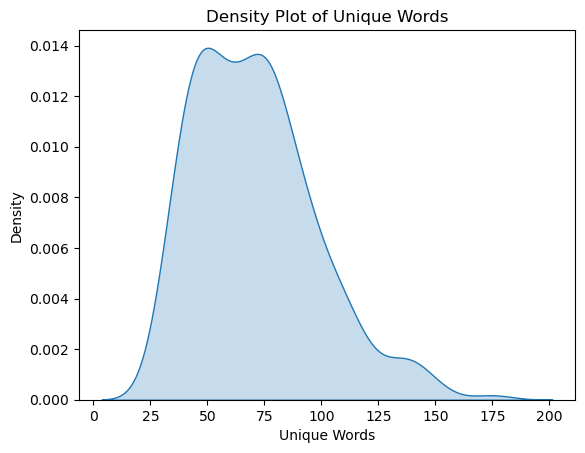

/var/folders/9t/wr9xvgnd2f54gfqg0n7k4g4c0000gn/T/ipykernel_29758/2290064224.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True)


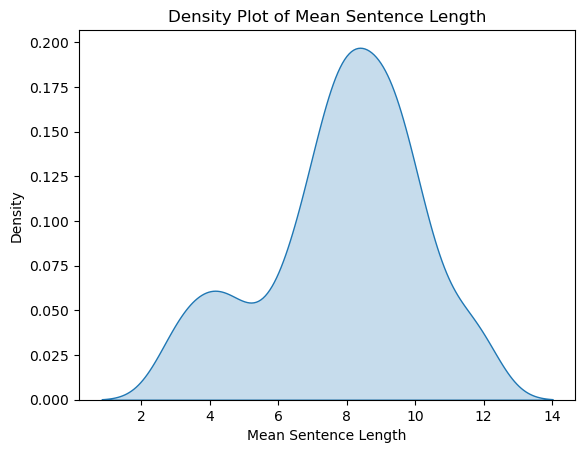

/var/folders/9t/wr9xvgnd2f54gfqg0n7k4g4c0000gn/T/ipykernel_29758/2290064224.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True)


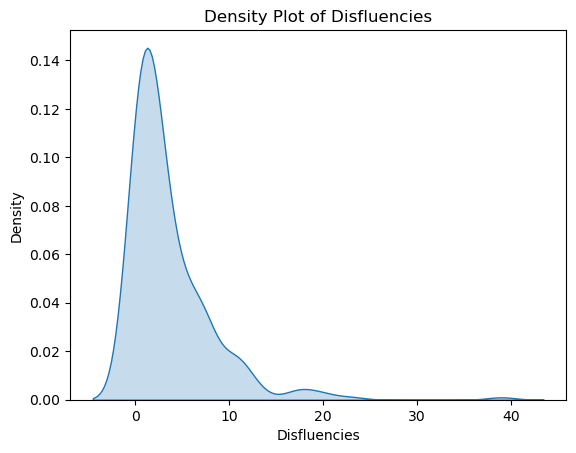

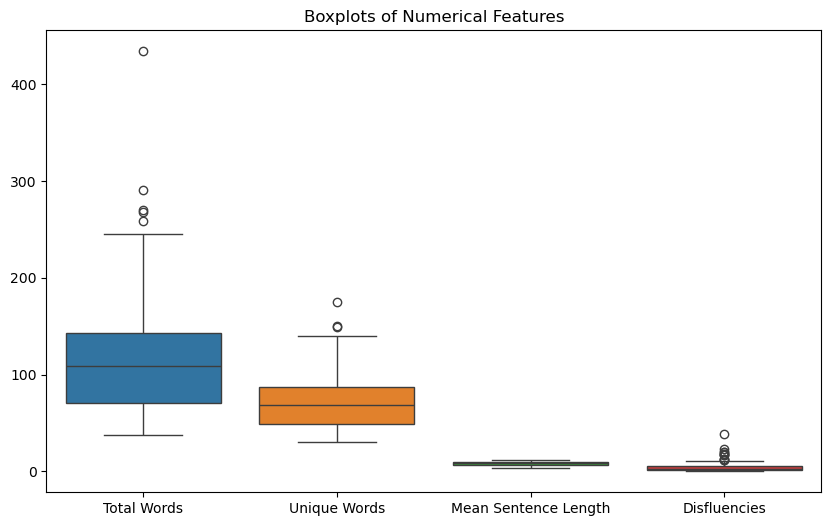

In [2]:

print(df.describe())

# histograms
numerical_features = ['Total Words', 'Unique Words', 'Mean Sentence Length', 'Disfluencies']
df[numerical_features].hist(bins=20, figsize=(12, 8))
plt.suptitle("Histograms of Numerical Features")
plt.show()

# density plots
for feature in numerical_features:
    sns.kdeplot(df[feature], shade=True)
    plt.title(f'Density Plot of {feature}')
    plt.show()

# boxplots for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_features])
plt.title('Boxplots of Numerical Features')
plt.show()

## Group Differences
Comparing distributions of features between `Control` and `Dementia` groups.

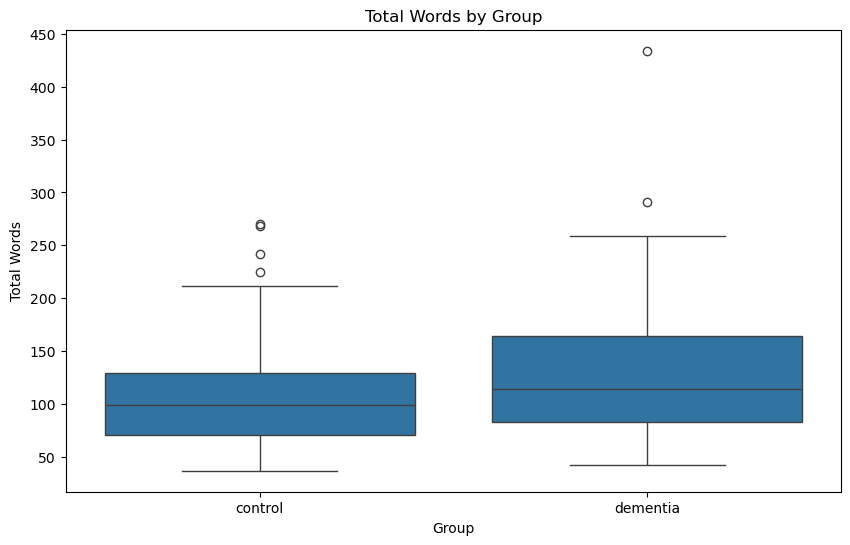

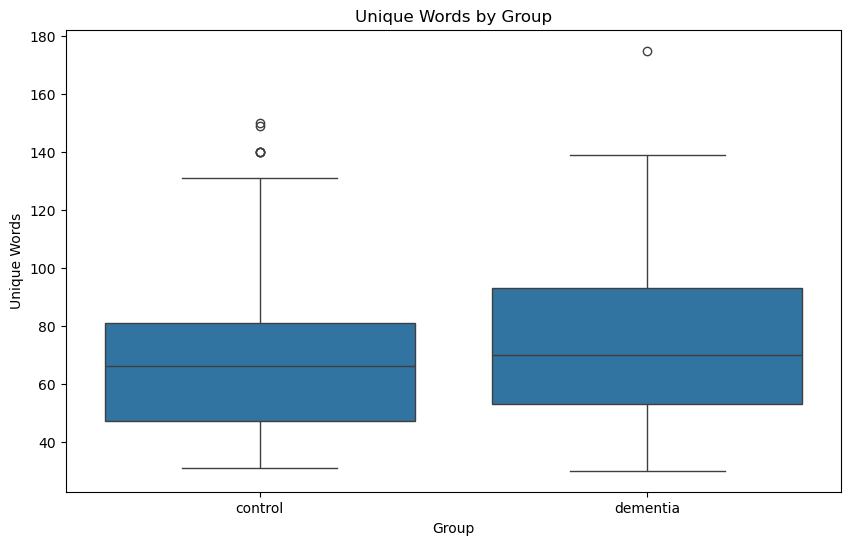

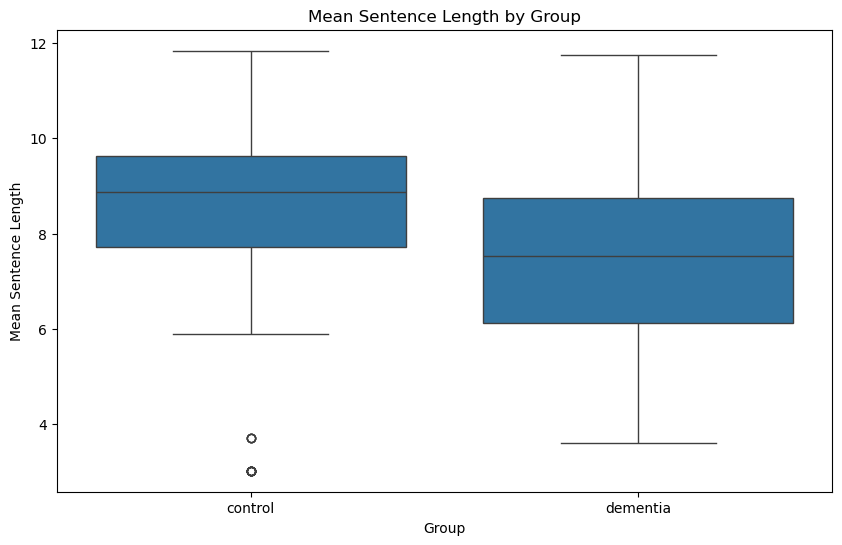

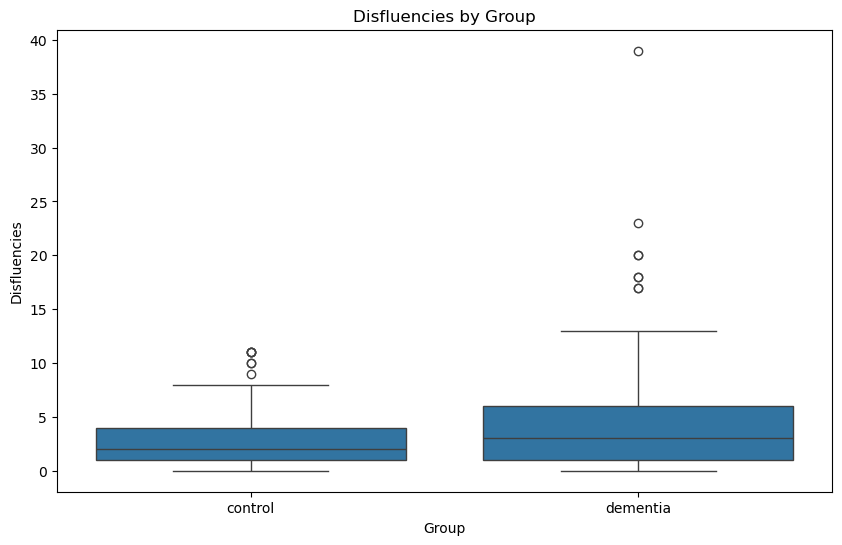

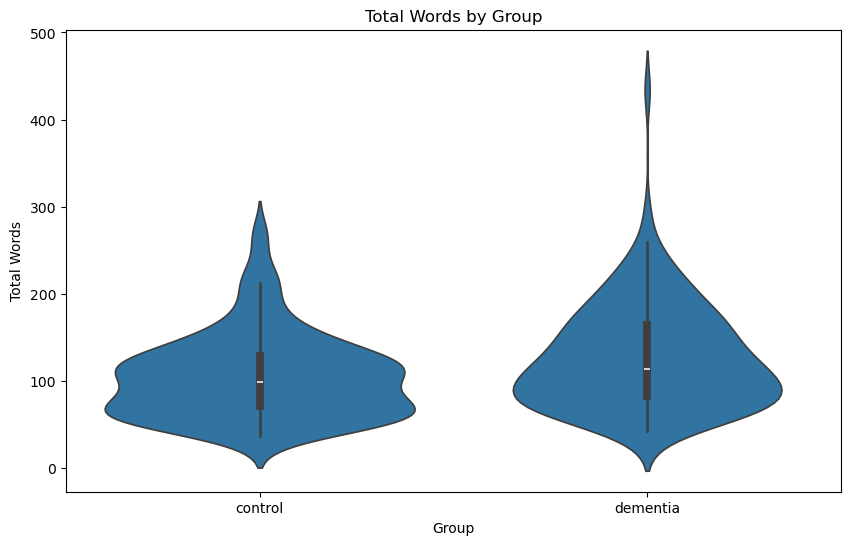

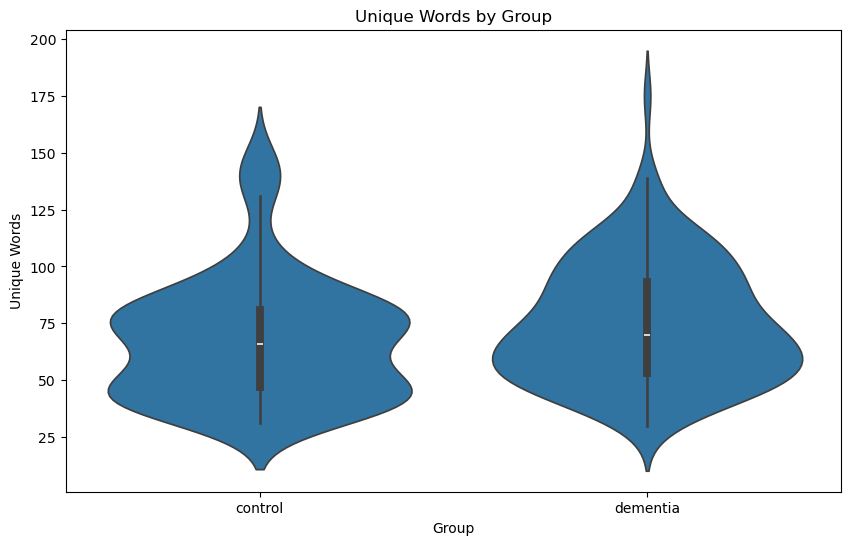

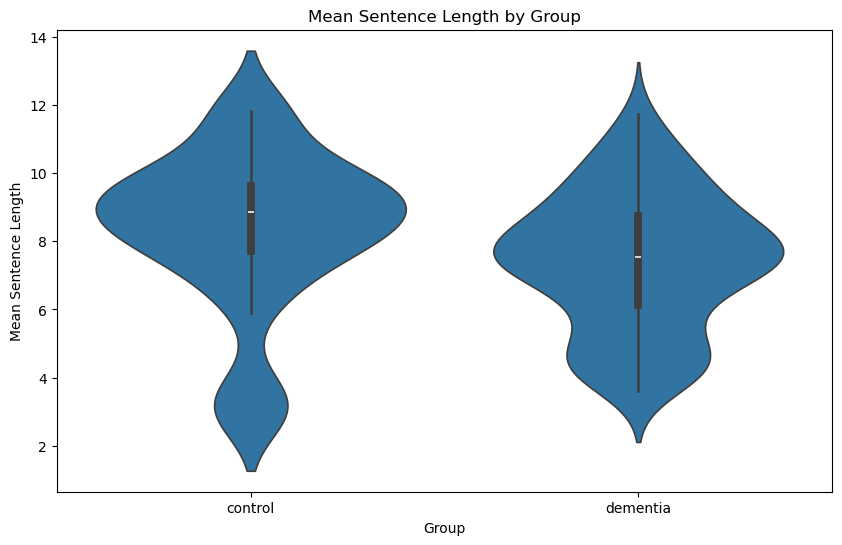

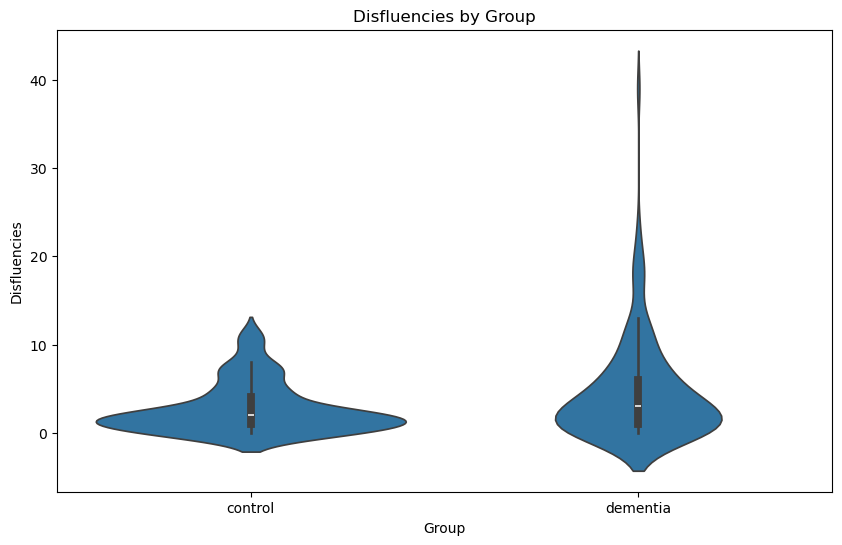

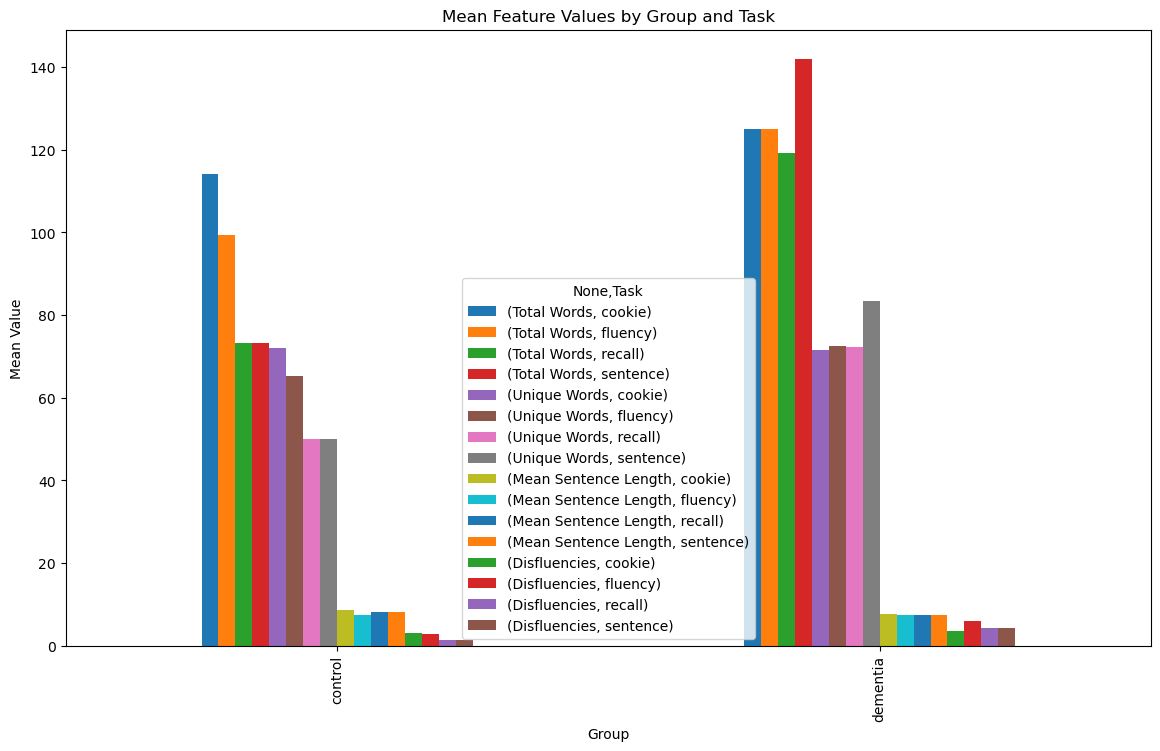

In [3]:
# boxplots for group comparisons
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Group', y=feature, data=df)
    plt.title(f'{feature} by Group')
    plt.show()

# violin plots
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='Group', y=feature, data=df)
    plt.title(f'{feature} by Group')
    plt.show()

# grouped bar plots for tasks
group_task_means = df.groupby(['Group', 'Task'])[numerical_features].mean().unstack()
group_task_means.plot(kind='bar', figsize=(14, 8))
plt.title('Mean Feature Values by Group and Task')
plt.ylabel('Mean Value')
plt.show()

## Correlations Between Features
Finding relationships between features to identify patterns or multicollinearity.

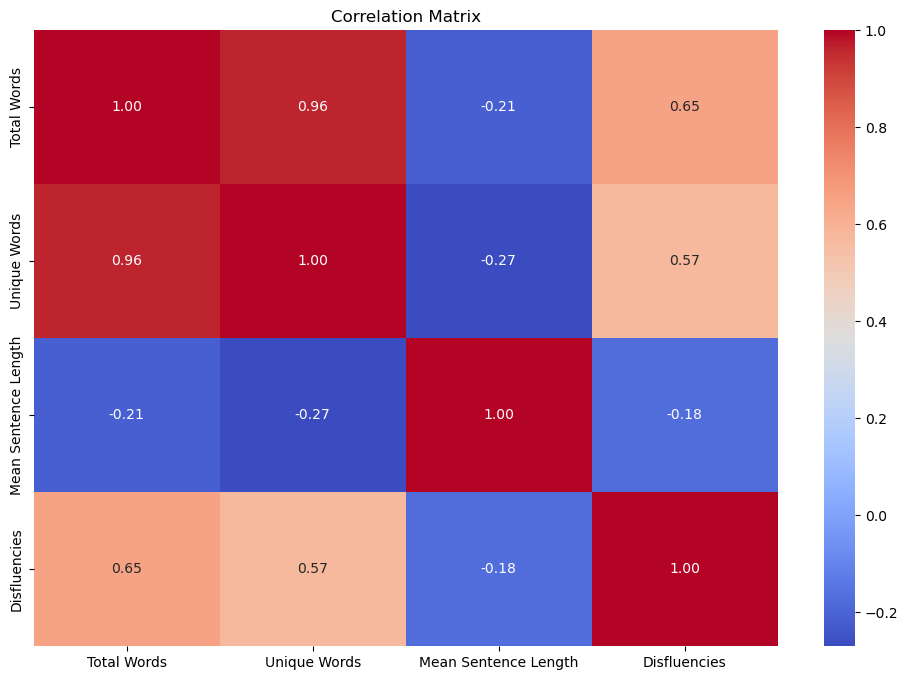

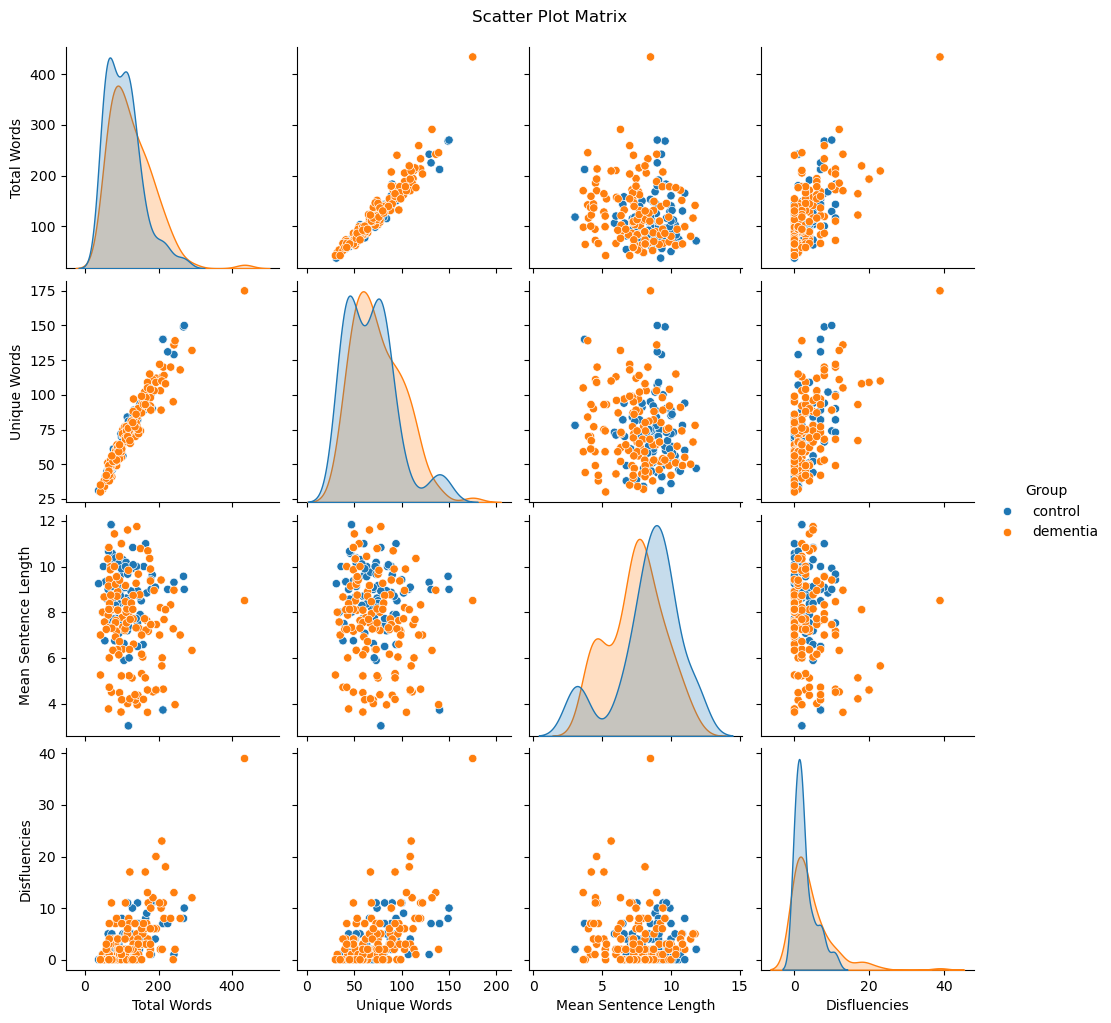

In [4]:
# Correlation matrix
corr_matrix = df[numerical_features].corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Scatter plots for specific pairs
sns.pairplot(df, vars=numerical_features, hue='Group', diag_kind='kde')
plt.suptitle("Scatter Plot Matrix", y=1.02)
plt.show()

## Preliminary Feature Importance
Statistical tests and basic models to identify important features.

Total Words: t-statistic = -3.29, p-value = 0.0011
Unique Words: t-statistic = -2.33, p-value = 0.0203
Mean Sentence Length: t-statistic = 3.42, p-value = 0.0007
Disfluencies: t-statistic = -3.25, p-value = 0.0013
Significant Features: ['Total Words', 'Unique Words', 'Mean Sentence Length', 'Disfluencies']


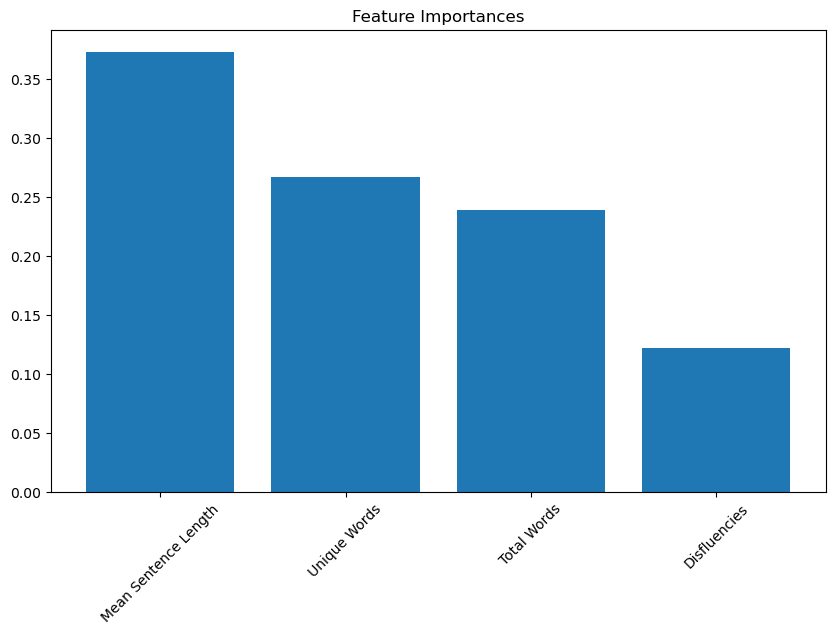

In [5]:
# t-tests for group differences
significant_features = []
for feature in numerical_features:
    control_values = df[df['Group'] == 'control'][feature]
    dementia_values = df[df['Group'] == 'dementia'][feature]
    stat, p = ttest_ind(control_values, dementia_values, nan_policy='omit')
    print(f"{feature}: t-statistic = {stat:.2f}, p-value = {p:.4f}")
    if p < 0.05:
        significant_features.append(feature)

print(f"Significant Features: {significant_features}")

# feature importance with Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# categorical vars
df['Group_encoded'] = LabelEncoder().fit_transform(df['Group'])

# train random forest
X = df[numerical_features]
y = df['Group_encoded']
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# feature importance
importances = rf.feature_importances_
sorted_idx = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[sorted_idx])
plt.xticks(range(len(importances)), np.array(numerical_features)[sorted_idx], rotation=45)
plt.title('Feature Importances')
plt.show()